<a href="https://colab.research.google.com/github/dzhamalovas/ML/blob/main/ML3_5_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метод K блиайших соседей

## Подготовка данных

In [ ]:
# импорт библиотек
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
# Загрузка
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Первый и второй столбцы
X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

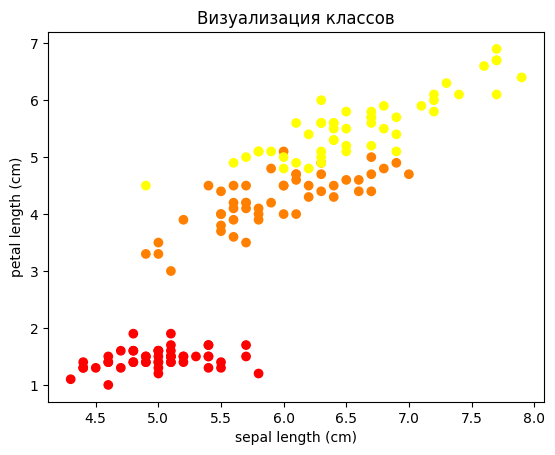

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

## MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

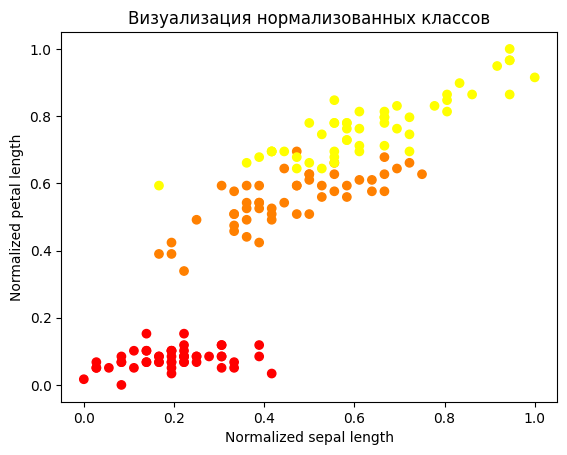

In [ ]:
# Визуализация нормализованных данных
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')
plt.title("Визуализация нормализованных классов")
plt.xlabel('Normalized sepal length')
plt.ylabel('Normalized petal length')
plt.show()

## Объект

In [ ]:
# Создание и обучение
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

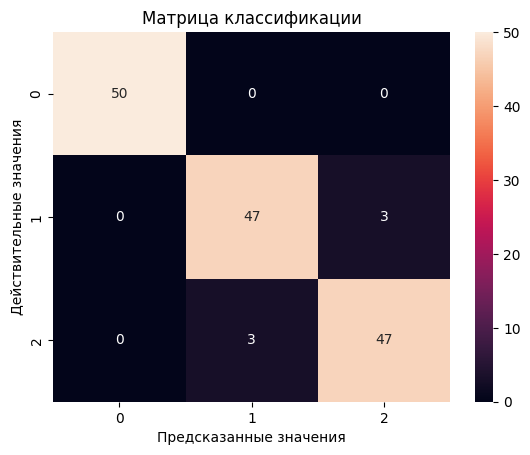

In [ ]:
# Матрица классификации
plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

In [ ]:
# Метрики
from sklearn.metrics import classification_report

print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



## Границы принятия решений

In [ ]:
# Подготовка данных
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

In [ ]:
# Нормализация
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


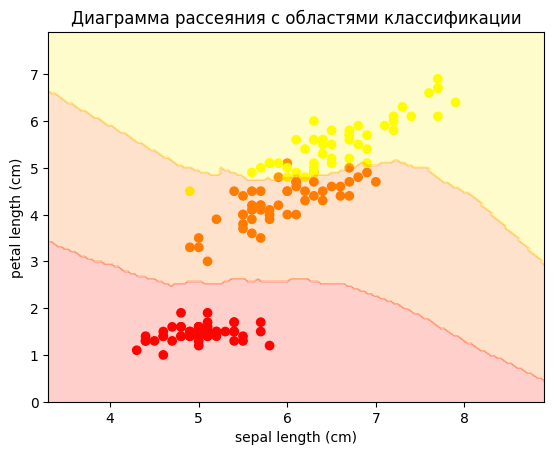

In [ ]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

## Новый объект

In [ ]:
observation_new = [[5.5, 5]]

In [ ]:
# Нормализация
observation_new_scaled = scaler.transform(observation_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
knn.predict(observation_new_scaled)

array([2])

In [ ]:
knn.predict_proba(observation_new_scaled)

array([[0., 0., 1.]])

In [ ]:
distances, indices = knn.kneighbors(observation_new_scaled)

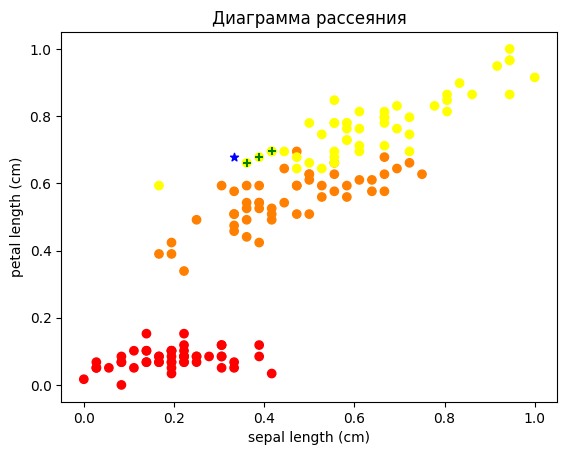

In [ ]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

# Задания для самостоятельного выполнения

## 1. Постройте последний график методических указаний в исходном пространстве признаков.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


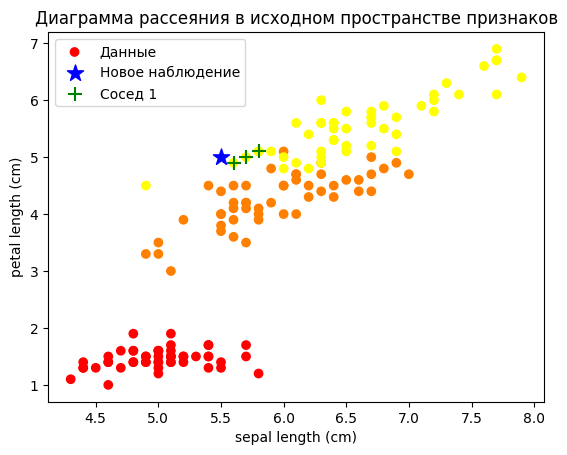

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
X = data.iloc[:, [0, 2]]  # Используем исходное пространство признаков (без нормализации)
y = iris.target

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

observation_new = [[5.5, 5]]

distances, indices = knn.kneighbors(observation_new)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', label='Данные')
plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b', s=150, label='Новое наблюдение')

# Отображаем ближайших соседей
for i in range(len(indices[0])):
    plt.scatter(X.iloc[indices[0][i], 0], X.iloc[indices[0][i], 1], marker='+', color='g', s=100, label=f'Сосед {i+1}' if i == 0 else "")

plt.title("Диаграмма рассеяния в исходном пространстве признаков")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()


## 2. Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


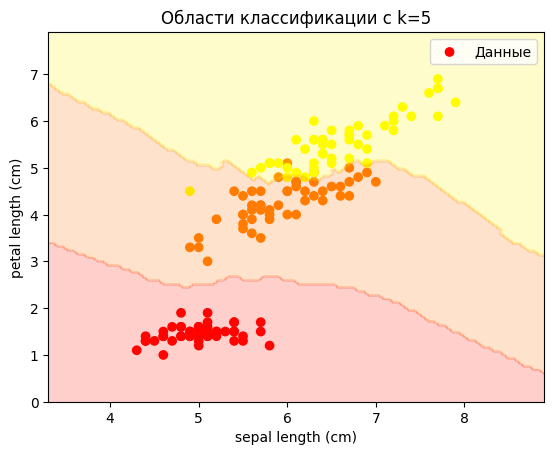

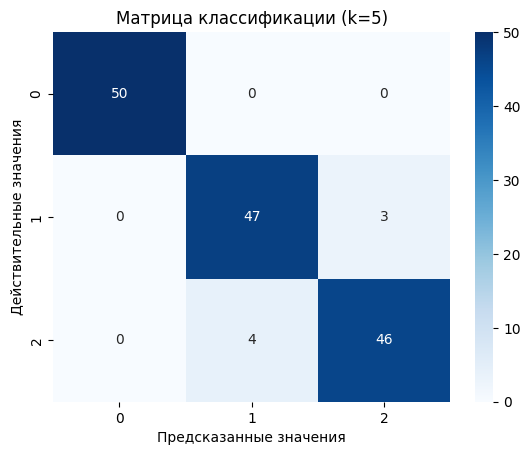

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.94      0.93        50
           2       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Нормализация данных
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Обучение модели KNN с k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Предсказание на обучающем наборе данных
y_pred = knn.predict(X_scaled)

# Визуализация областей классификации
X0 = np.linspace(X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1, 100)
X1 = np.linspace(X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1, 100)

X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

# Нормализация сетки
XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

# Построение графика
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', label='Данные')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Области классификации с k=5")
plt.legend()
plt.show()

# Оценка эффективности модели
conf_matrix = confusion_matrix(y, y_pred)
classification_rep = classification_report(y, y_pred)

# Выводим матрицу классификации и отчет
plt.title("Матрица классификации (k=5)")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print("Отчет о классификации:\n", classification_rep)


## 3. Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?


In [ ]:
import warnings

warnings.filterwarnings("ignore")

observation_new_out_of_bounds = pd.DataFrame([[10, 10]], columns=iris.feature_names[::2])
observation_new_scaled_out_of_bounds = scaler.transform(observation_new_out_of_bounds)

print("Нормализованное значение нового наблюдения за пределами области определения выборки:", observation_new_scaled_out_of_bounds)


Нормализованное значение нового наблюдения за пределами области определения выборки: [[1.58333333 1.52542373]]


Если наблюдение выходит за пределы диапазона, то нормализованные значения будут соответствующим образом выше 1 или ниже 0.

## 4. Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.


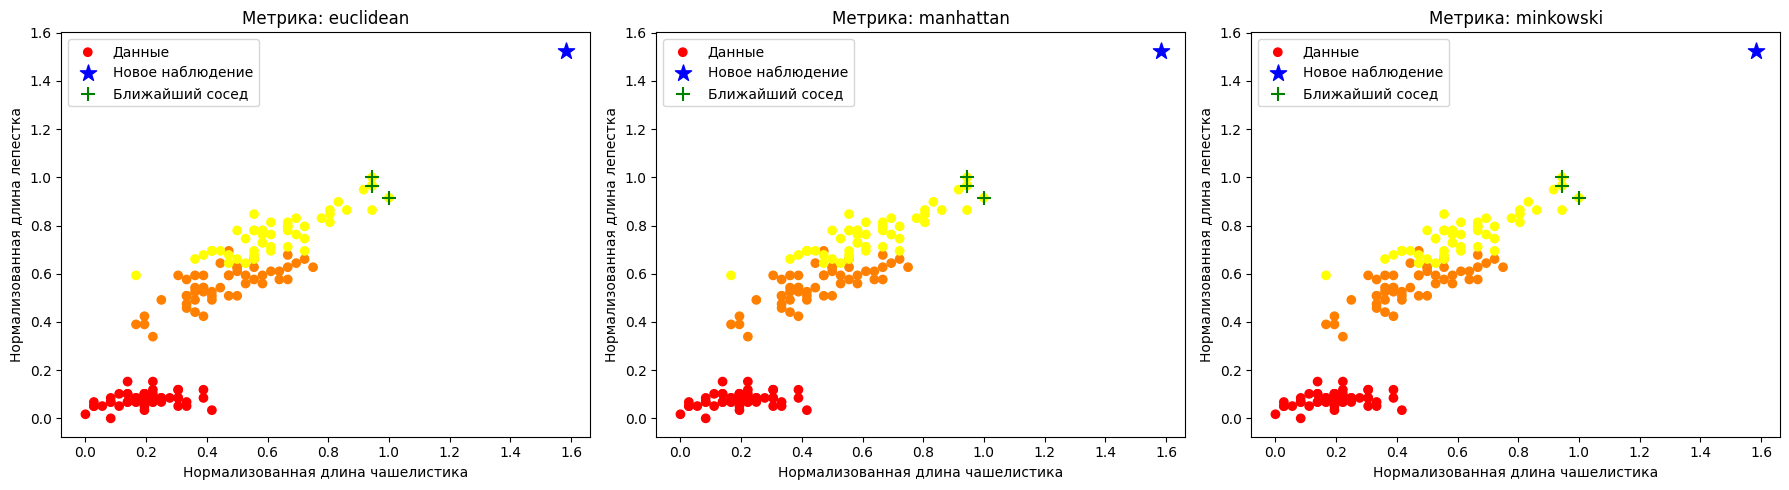

In [ ]:
metrics = ['euclidean', 'manhattan', 'minkowski']
neighbors_indices = {}

plt.figure(figsize=(18, 5))

for i, metric in enumerate(metrics):
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)

    distances, indices = knn.kneighbors(observation_new_scaled_out_of_bounds)
    neighbors_indices[metric] = indices

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn', label='Данные')
    plt.scatter(observation_new_scaled_out_of_bounds[0][0], observation_new_scaled_out_of_bounds[0][1], marker='*', color='b', s=150, label='Новое наблюдение')

    for index in indices[0]:
        plt.scatter(X_scaled[index, 0], X_scaled[index, 1], marker='+', color='g', s=100, label='Ближайший сосед' if index == indices[0][0] else "")

    plt.title(f"Метрика: {metric}")
    plt.xlabel('Нормализованная длина чашелистика')
    plt.ylabel('Нормализованная длина лепестка')
    plt.legend()

plt.tight_layout()
plt.show()


## 5. Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.


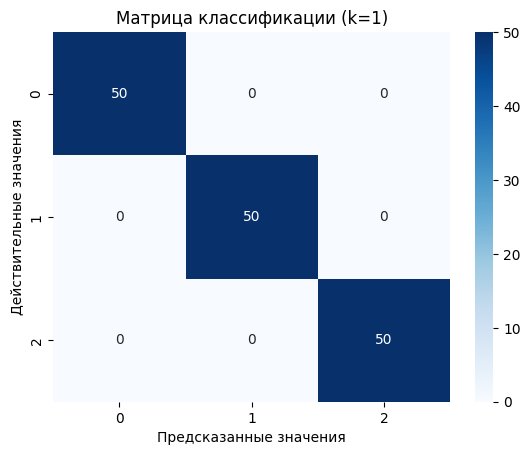

Отчет о классификации (k=1):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150




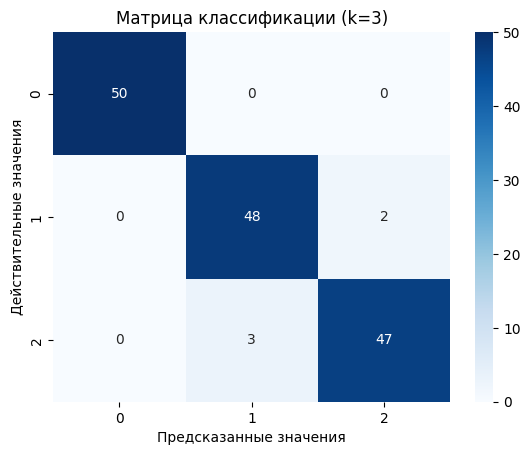

Отчет о классификации (k=3):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.96      0.95        50
           2       0.96      0.94      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150




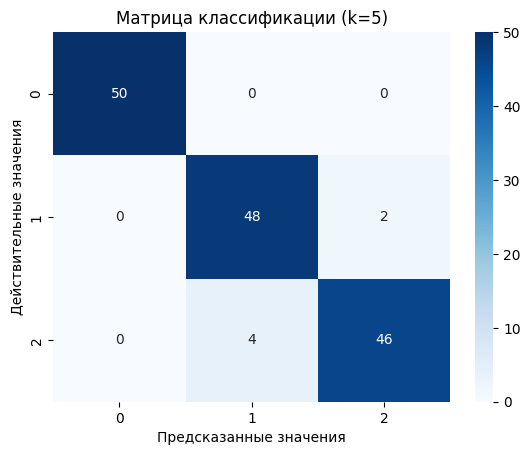

Отчет о классификации (k=5):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150




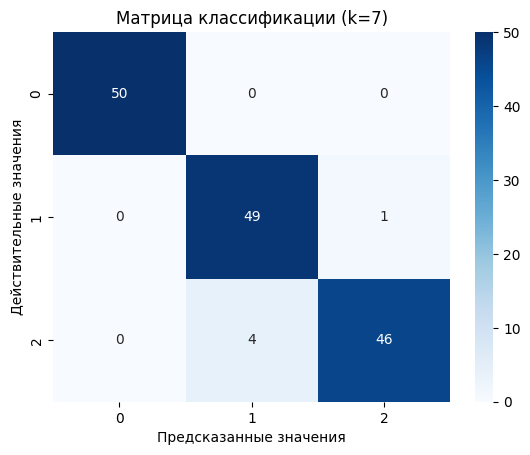

Отчет о классификации (k=7):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.98      0.95        50
           2       0.98      0.92      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150




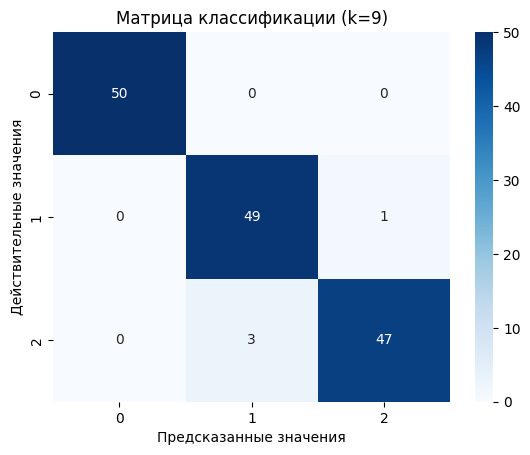

Отчет о классификации (k=9):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.98      0.96        50
           2       0.98      0.94      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150




In [ ]:
X_full = iris.data
y_full = iris.target

scaler_full = MinMaxScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Проверяем разные значения k
k_values = [1, 3, 5, 7, 9]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_full_scaled, y_full)

    y_pred_full = knn.predict(X_full_scaled)

    conf_matrix_full = confusion_matrix(y_full, y_pred_full)
    classification_rep_full = classification_report(y_full, y_pred_full)

    results[k] = {
        'conf_matrix': conf_matrix_full,
        'classification_report': classification_rep_full,
    }

    # Выводим матрицу классификации и отчет
    plt.title(f"Матрица классификации (k={k})")
    sns.heatmap(conf_matrix_full, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')
    plt.show()

    print(f"Отчет о классификации (k={k}):\n{classification_rep_full}\n")


## 6. Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.


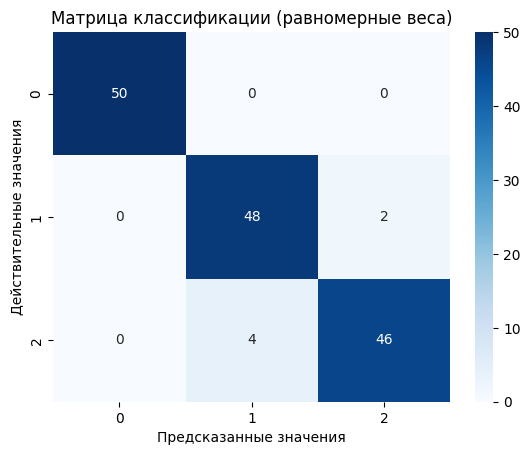

Отчет о классификации (равномерные веса):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.96      0.94        50
           2       0.96      0.92      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



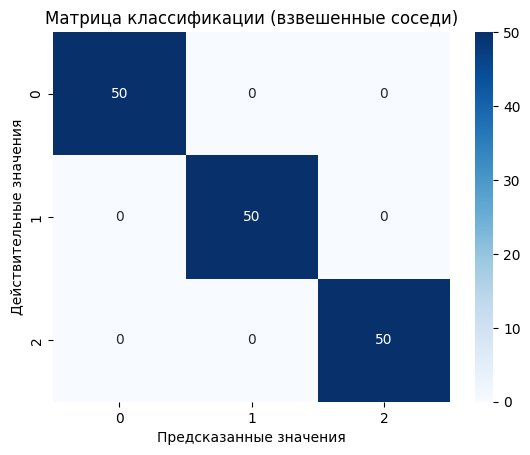

Отчет о классификации (взвешенные соседи):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [ ]:
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_full_scaled, y_full)

y_pred_uniform = knn_uniform.predict(X_full_scaled)

conf_matrix_uniform = confusion_matrix(y_full, y_pred_uniform)
classification_rep_uniform = classification_report(y_full, y_pred_uniform)

plt.title("Матрица классификации (равномерные веса)")
sns.heatmap(conf_matrix_uniform, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print("Отчет о классификации (равномерные веса):\n", classification_rep_uniform)

knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_full_scaled, y_full)

y_pred_distance = knn_distance.predict(X_full_scaled)

conf_matrix_distance = confusion_matrix(y_full, y_pred_distance)
classification_rep_distance = classification_report(y_full, y_pred_distance)

# Вывод матрицы классификации и отчета
plt.title("Матрица классификации (взвешенные соседи)")
sns.heatmap(conf_matrix_distance, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

print("Отчет о классификации (взвешенные соседи):\n", classification_rep_distance)


## 7. Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод.


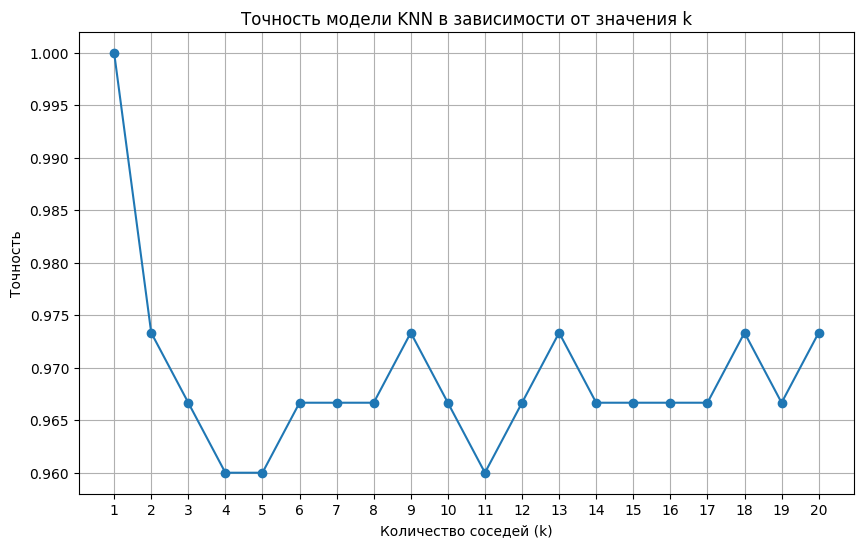

k = 1: Точность = 1.0000
k = 2: Точность = 0.9733
k = 3: Точность = 0.9667
k = 4: Точность = 0.9600
k = 5: Точность = 0.9600
k = 6: Точность = 0.9667
k = 7: Точность = 0.9667
k = 8: Точность = 0.9667
k = 9: Точность = 0.9733
k = 10: Точность = 0.9667
k = 11: Точность = 0.9600
k = 12: Точность = 0.9667
k = 13: Точность = 0.9733
k = 14: Точность = 0.9667
k = 15: Точность = 0.9667
k = 16: Точность = 0.9667
k = 17: Точность = 0.9667
k = 18: Точность = 0.9733
k = 19: Точность = 0.9667
k = 20: Точность = 0.9733


In [ ]:
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_full_scaled, y_full)

    y_pred = knn.predict(X_full_scaled)

    accuracy = np.mean(y_pred == y_full)
    accuracy_scores.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.title("Точность модели KNN в зависимости от значения k")
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid()
plt.show()

# Выводим значения точности
for k, acc in zip(k_values, accuracy_scores):
    print(f"k = {k}: Точность = {acc:.4f}")


## 8. Выберите датасет и постройте регрессию при помощи метода ближайших соседей.


Средняя квадратичная ошибка (MSE): 0.4324
Коэффициент детерминации (R^2): 0.6700


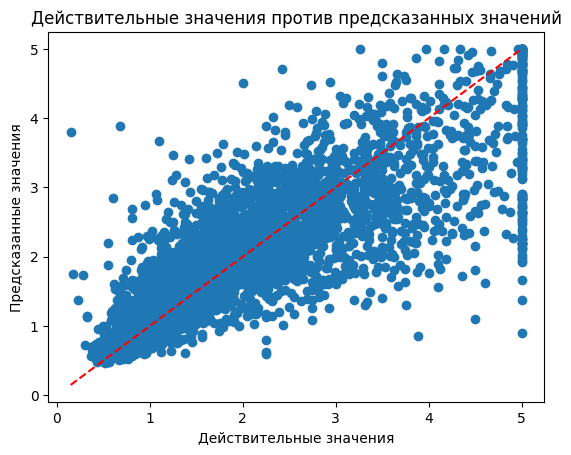

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

y_pred = knn_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Средняя квадратичная ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R^2): {r2:.4f}")

# Визуализация предсказаний
plt.scatter(y_test, y_pred)
plt.xlabel("Действительные значения")
plt.ylabel("Предсказанные значения")
plt.title("Действительные значения против предсказанных значений")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Линия y = x
plt.show()


# Контрольные вопросы

## 1. Чем отличается стандартизация и манимаксная нормализация данных? Есть ли другие методы нормализации данных? Когда следует применять какие методы?
- **Стандартизация**. Приводит данные к стандартному нормальному распределению (среднее = 0, стандартное отклонение = 1). Рассчитывается по формуле:
  - `z = (x - μ) / σ`
  - где `μ` — среднее значение, `σ` — стандартное отклонение.
  
- **Минимаксная нормализация**. Масштабирует данные так, чтобы они находились в интервале [0, 1]. Рассчитывается по формуле:
  - `x' = (x - min) / (max - min)`
  - где `min` и `max` — минимальные и максимальные значения в выборке.

- **Другие методы нормализации**:
  - **Robust Scaler**. Использует медиану и интерквартильный размах, менее чувствителен к выбросам.
  - **MaxAbsScaler**. Масштабирует данные по максимальному абсолютному значению.

- **Когда применять**:
  - **Стандартизация**. Лучше применять, если данные имеют нормальное распределение или есть выбросы.
  - **Минимаксная нормализация**. Полезна, когда важна сохранность интервалов данных, и нет выбросов.

## 2. В чем смысл параметра k в алгоритме ближайших соседей? Как его выбирать?
- **Смысл параметра k**: Это количество ближайших соседей, учитываемых при классификации или регрессии. Чем меньше k, тем больше вероятность того, что модель будет подвержена шуму. Чем больше k, тем модель будет более устойчивой, но может терять локальные характеристики данных.

- **Как выбирать**? Обычно значение k выбирается через кросс-валидацию. Начинать можно с малых значений (например, 1 или 3) и постепенно увеличивать, оценивая точность на валидационном наборе.

## 3. Чем отличается взвешенный и равномерный вариант метода ближайших соседей? Когда применять какой?
- **Равномерный вариант**: Все соседи имеют одинаковый вес. Принимает решение, основываясь на равном количестве голосов от всех ближайших соседей.

- **Взвешенный вариант**: Соседи взвешиваются по обратному расстоянию до наблюдаемого объекта. Ближайшие соседи оказывают большее влияние на предсказание.

- **Когда применять**? Взвешенные соседи могут быть предпочтительнее, когда важно учитывать расстояние между объектами и минимизировать влияние более удаленных точек. Равномерные соседи могут быть проще для интерпретации и могут работать лучше на менее шумных данных.

## 4. Почему нормализованное по минимаксному методу значение может быть больше 1?
- Нормализованное значение по минимаксному методу **не может быть больше 1**, если данные корректно нормализованы. Если значение выходит за пределы [0, 1], это может указывать на ошибки в данных или в процессе нормализации. Например, если вы применяете MinMaxScaler к новым данным, которые не соответствуют диапазону обучающего набора, это может привести к ошибкам.

## 5. Что такое метрики расстояния и как они влияют на работу метода ближайших соседей?
- **Метрики расстояния**: Это функции, которые измеряют "сходство" или "различие" между двумя объектами. Наиболее распространенные метрики:
  - **Евклидово расстояние**: Стандартная метрика, использующаяся для непрерывных данных.
  - **Манхэттенское расстояние**: Сумма абсолютных разностей по всем измерениям.
  - **Минковское расстояние**: Обобщает как евклидово, так и манхэттенское расстояние.
  - **Косинусное расстояние**: Измеряет угол между векторами, полезно для текстовых данных.

- **Влияние на работу KNN**: Разные метрики могут приводить к различным результатам классификации. Например, если данные имеют высокую размерность или разрозненные особенности, использование манхэттенского расстояния может дать более стабильные результаты, чем евклидово. Выбор метрики зависит от природы данных и задачи.


# Дополнительные задания


## 1. Создайте интерактивный график, на котором можно в режиме реального времени менять положение точки, соответствующей новому наблюдению. График должен анимированно визуализировать ближайших соседей этой точки.


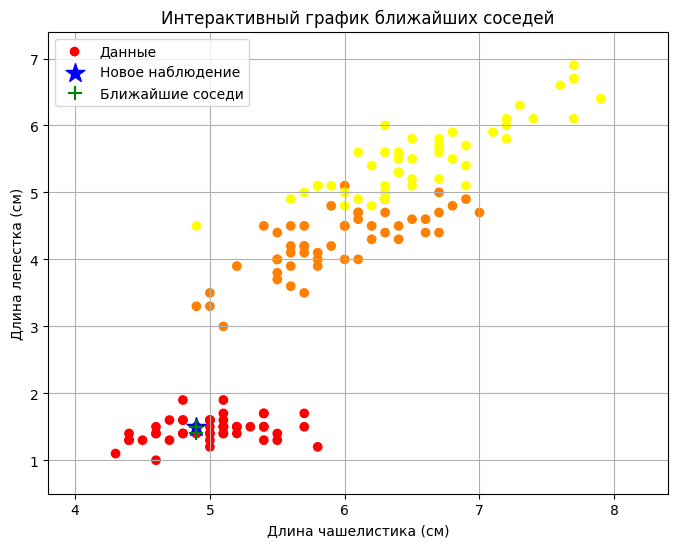

In [ ]:
from matplotlib.animation import FuncAnimation
from ipywidgets import FloatSlider, VBox

iris = load_iris()
features = iris.data
X = pd.DataFrame(features, columns=iris.feature_names).iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

def animate_neighbors(x_new, y_new):
    observation_new_scaled = scaler.transform([[x_new, y_new]])

    distances, indices = knn.kneighbors(observation_new_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', label='Данные')
    plt.scatter(x_new, y_new, marker='*', color='b', s=200, label='Новое наблюдение')

    plt.scatter(X.iloc[indices[0], 0], X.iloc[indices[0], 1], marker='+', color='g', s=100, label='Ближайшие соседи')

    plt.title('Интерактивный график ближайших соседей')
    plt.xlabel('Длина чашелистика (см)')
    plt.ylabel('Длина лепестка (см)')
    plt.legend()
    plt.xlim(X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5)
    plt.ylim(X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5)
    plt.grid()
    plt.show()

x_slider = FloatSlider(value=5.0, min=4.0, max=8.0, step=0.1, description='Длина чашелистика')
y_slider = FloatSlider(value=1.5, min=0.0, max=7.0, step=0.1, description='Длина лепестка')

def update_plot(change):
    plt.close()
    animate_neighbors(x_slider.value, y_slider.value)

x_slider.observe(update_plot, 'value')
y_slider.observe(update_plot, 'value')

VBox([x_slider, y_slider])


## 2. Модифицируйтеанимацию из предыдущего задания так, чтобы можно было менять количество ближайших соседей, метрику расстояния.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import FloatSlider, Dropdown, VBox

iris = load_iris()
features = iris.data
X = pd.DataFrame(features, columns=iris.feature_names).iloc[:, [0, 2]]
y = iris.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

def animate_neighbors(x_new, y_new):
    observation_new_scaled = scaler.transform([[x_new, y_new]])

    distances, indices = knn.kneighbors(observation_new_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', label='Данные')
    plt.scatter(x_new, y_new, marker='*', color='b', s=200, label='Новое наблюдение')

    plt.scatter(X.iloc[indices[0], 0], X.iloc[indices[0], 1], marker='+', color='g', s=100, label='Ближайшие соседи')

    plt.title('Интерактивный график ближайших соседей')
    plt.xlabel('Длина чашелистика (см)')
    plt.ylabel('Длина лепестка (см)')
    plt.legend()
    plt.xlim(X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5)
    plt.ylim(X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5)
    plt.grid()
    plt.show()

x_slider = FloatSlider(value=5.0, min=4.0, max=8.0, step=0.1, description='Длина чашелистика')
y_slider = FloatSlider(value=1.5, min=0.0, max=7.0, step=0.1, description='Длина лепестка')

def update_plot(change):
    plt.close()
    animate_neighbors(x_slider.value, y_slider.value)

x_slider.observe(update_plot, 'value')
y_slider.observe(update_plot, 'value')

# Задание 2: Модификация анимации с параметрами
def animate_neighbors_k(x_new, y_new, n_neighbors, metric):
    observation_new_scaled = scaler.transform([[x_new, y_new]])

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    knn.fit(X_scaled, y)

    distances, indices = knn.kneighbors(observation_new_scaled)

    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn', label='Данные')
    plt.scatter(x_new, y_new, marker='*', color='b', s=200, label='Новое наблюдение')

    plt.scatter(X.iloc[indices[0], 0], X.iloc[indices[0], 1], marker='+', color='g', s=100, label='Ближайшие соседи')

    plt.title('Интерактивный график ближайших соседей с параметрами')
    plt.xlabel('Длина чашелистика (см)')
    plt.ylabel('Длина лепестка (см)')
    plt.legend()
    plt.xlim(X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5)
    plt.ylim(X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5)
    plt.grid()
    plt.show()

k_slider = FloatSlider(value=3, min=1, max=10, step=1, description='Количество соседей')
metric_dropdown = Dropdown(
    options=['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
    value='euclidean',
    description='Метрика',
)

def update_plot_k(change):
    plt.close()
    animate_neighbors_k(x_slider.value, y_slider.value, int(k_slider.value), metric_dropdown.value)

x_slider.observe(update_plot_k, 'value')
y_slider.observe(update_plot_k, 'value')
k_slider.observe(update_plot_k, 'value')
metric_dropdown.observe(update_plot_k, 'value')

VBox([x_slider, y_slider, k_slider, metric_dropdown])
